In [42]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows=None
pd.options.display.max_columns=None
import seaborn as sns
import gc
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline
import datetime

In [33]:
ss=pd.read_csv('final_train.csv')
sites=pd.read_csv('sites_metadata.csv')

In [34]:
ss.shape

(398867, 7)

In [35]:
ss.head()

,channel_id,Site,TimeStamp,pm2_5,pm10,s2_pm2_5,s2_pm10
0,672528,"Kasharara, Rubirizi",2019-01-12 11,24.143333,26.253333,17.363333,17.556667
1,672528,"Kasharara, Rubirizi",2019-01-12 12,21.483333,22.496667,16.390000,18.133333
2,672528,"Kasharara, Rubirizi",2019-01-14 15,104.745714,115.884286,91.912857,100.761429
3,672528,"Kasharara, Rubirizi",2019-01-14 16,95.730000,107.880000,98.517391,106.456522
4,672528,"Kasharara, Rubirizi",2019-01-14 17,147.107826,159.262174,142.483478,149.680000


In [36]:
sites.head()

,name,latitude,longitude,country,region,district,city,county,sub_county,parish,street,formatted_name,altitude,greenness,landform_90,landform_270,aspect,distance_to_nearest_road,distance_to_nearest_primary_road,distance_to_nearest_tertiary_road,distance_to_nearest_unclassified_road,distance_to_nearest_residential_road,distance_to_nearest_secondary_road,distance_to_kampala_center,bearing_to_kampala_center
0,"Bweyogerere, Kira Municipality",0.350100,32.666200,Uganda,Central Region,Wakiso,Kampala,Kampala,Bweyogerere Division,Bweyogerere,NaN,NaN,1166.513916,NaN,31.0,-2.0,NaN,16.95,NaN,454.06,448.69,16.95,29.06,9.494684,67.293040
1,"Kasharara, Rubirizi",-0.265089,30.106887,Uganda,Western,Rubirizi,Rubirizi,Rubirizi,Rubiriziri town council,Kasharara,Mbarara - Kasese Road,NaN,1324.792236,4869.8,31.0,-1.0,279.46,6.61,6.61,88.10,396.87,542.79,NaN,283.538298,256.793325
2,"Central Division, Tororo",0.693930,34.181350,Uganda,Eastern Region,Tororo,Tororo,Tororo,Western division,Central,Bazaar Street,NaN,1200.667969,2875.3,24.0,3.0,63.44,12.12,12.12,NaN,12.86,58.59,92.69,182.252178,76.693245
3,"Nyahuka, Bundibugyo",0.674056,29.994029,Uganda,Western Region,Bundibugyo,Nyahuka,Bundibugyo,Nyahuka town council,Bundimulinga,Fort Portal - Bundibugyo - Lamia Road,NaN,850.974853,6535.0,31.0,-9.0,300.96,2.80,2.80,NaN,110.89,26.33,NaN,291.371007,277.846159
4,"Kisanga, Kasese",0.178013,30.083665,Uganda,Western Region,Kasese,Kasese,Kasese,Nyamwamba division,Kisanga,Unnamed Road,NaN,980.737549,3249.0,34.0,-3.0,270.00,12.65,281.70,436.20,83.68,12.65,NaN,279.140439,266.825334


In [37]:
sites.rename(columns={'name':'Site'},inplace=True)

In [38]:
train_data=ss.merge(sites,how='left',on='Site')

In [39]:
train_data.shape

(398867, 31)

In [40]:
train_data.tail()

,channel_id,Site,TimeStamp,pm2_5,pm10,s2_pm2_5,s2_pm10,latitude,longitude,country,region,district,city,county,sub_county,parish,street,formatted_name,altitude,greenness,landform_90,landform_270,aspect,distance_to_nearest_road,distance_to_nearest_primary_road,distance_to_nearest_tertiary_road,distance_to_nearest_unclassified_road,distance_to_nearest_residential_road,distance_to_nearest_secondary_road,distance_to_kampala_center,bearing_to_kampala_center
398862,930427,"Luwafu, Makindye",2020-12-30 19,57.248605,71.696279,58.630000,72.258372,0.2689,32.588,Uganda,Central Region,Kampala,Kampala,Kampala,Makindye division,Luwafu,Salaama Road,NaN,1171.499023,3293.4,31.0,-20.0,240.95,27.7,NaN,371.4,560.45,27.9,27.7,5.334824,179.0
398863,930427,"Luwafu, Makindye",2020-12-30 20,67.417674,82.198372,68.849302,82.717209,0.2689,32.588,Uganda,Central Region,Kampala,Kampala,Kampala,Makindye division,Luwafu,Salaama Road,NaN,1171.499023,3293.4,31.0,-20.0,240.95,27.7,NaN,371.4,560.45,27.9,27.7,5.334824,179.0
398864,930427,"Luwafu, Makindye",2020-12-30 21,53.199048,64.725476,55.103571,66.752619,0.2689,32.588,Uganda,Central Region,Kampala,Kampala,Kampala,Makindye division,Luwafu,Salaama Road,NaN,1171.499023,3293.4,31.0,-20.0,240.95,27.7,NaN,371.4,560.45,27.9,27.7,5.334824,179.0
398865,930427,"Luwafu, Makindye",2020-12-30 22,79.034762,90.177143,82.815952,93.093333,0.2689,32.588,Uganda,Central Region,Kampala,Kampala,Kampala,Makindye division,Luwafu,Salaama Road,NaN,1171.499023,3293.4,31.0,-20.0,240.95,27.7,NaN,371.4,560.45,27.9,27.7,5.334824,179.0
398866,930427,"Luwafu, Makindye",2020-12-30 23,49.501860,61.971628,51.370000,64.125349,0.2689,32.588,Uganda,Central Region,Kampala,Kampala,Kampala,Makindye division,Luwafu,Salaama Road,NaN,1171.499023,3293.4,31.0,-20.0,240.95,27.7,NaN,371.4,560.45,27.9,27.7,5.334824,179.0


In [20]:
train_data['TimeStamp']=pd.to_datetime(train_data['TimeStamp'])

In [90]:
test_df=pd.read_csv('final_test.csv')

In [91]:
test_data=test_df.merge(sites,how='left',on='Site')

In [92]:
test_data['TimeStamp']=pd.to_datetime(test_data['TimeStamp'])

#### Visualizing pm2_5

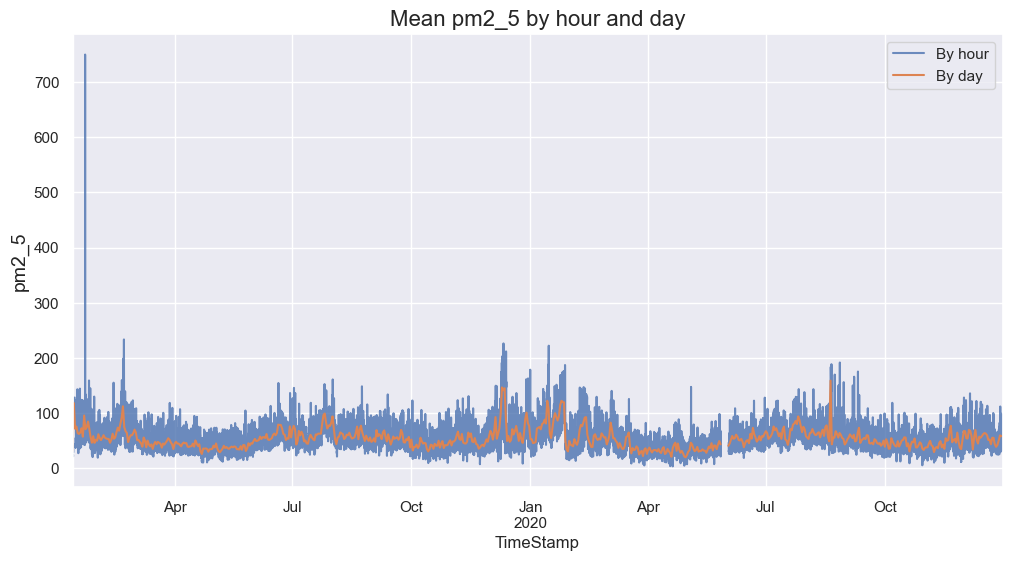

In [53]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
train_data[['TimeStamp', 'pm2_5']].set_index('TimeStamp').resample('H').mean()['pm2_5'].plot(ax=axes, label='By hour', alpha=0.8).set_ylabel('pm2_5', fontsize=14);
train_data[['TimeStamp', 'pm2_5']].set_index('TimeStamp').resample('D').mean()['pm2_5'].plot(ax=axes, label='By day', alpha=1).set_ylabel('pm2_5', fontsize=14);

axes.set_title('Mean pm2_5 by hour and day', fontsize=16);
axes.legend();

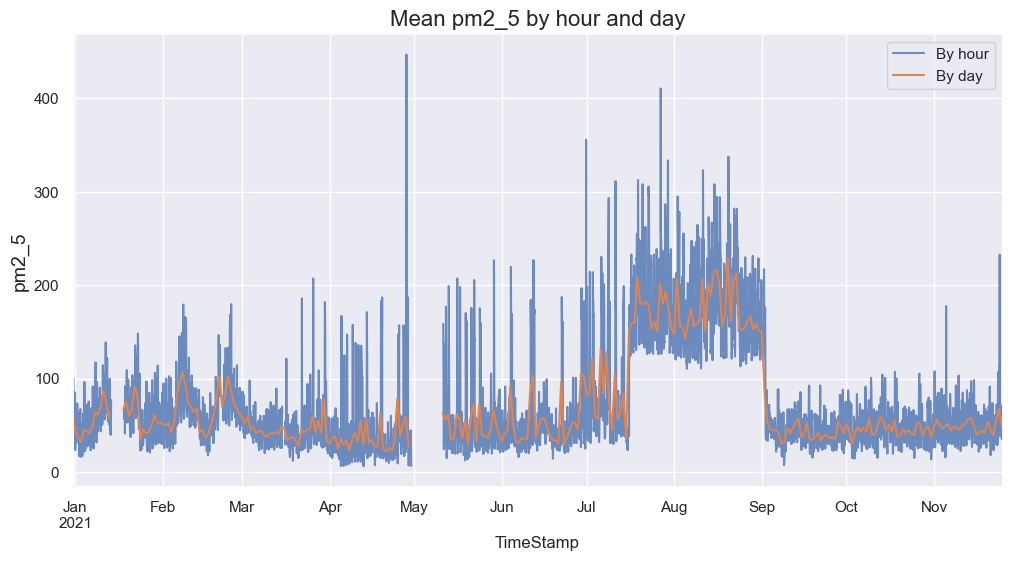

In [51]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
test_data[['TimeStamp', 'pm2_5']].set_index('TimeStamp').resample('H').mean()['pm2_5'].plot(ax=axes, label='By hour', alpha=0.8).set_ylabel('pm2_5', fontsize=14);
test_data[['TimeStamp', 'pm2_5']].set_index('TimeStamp').resample('D').mean()['pm2_5'].plot(ax=axes, label='By day', alpha=1).set_ylabel('pm2_5', fontsize=14);
axes.set_title('Mean pm2_5 by hour and day', fontsize=16);
axes.legend();

In [93]:
data=pd.concat([train_data,test_data])

In [94]:
n_split=train_data.shape[0]

In [95]:
n_split

398867

In [96]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [97]:
data['channel_id']=le.fit_transform(data['channel_id'])

In [98]:
train_data=data[:n_split]
test_data=data[n_split:]

In [65]:
data.shape

(595165, 31)

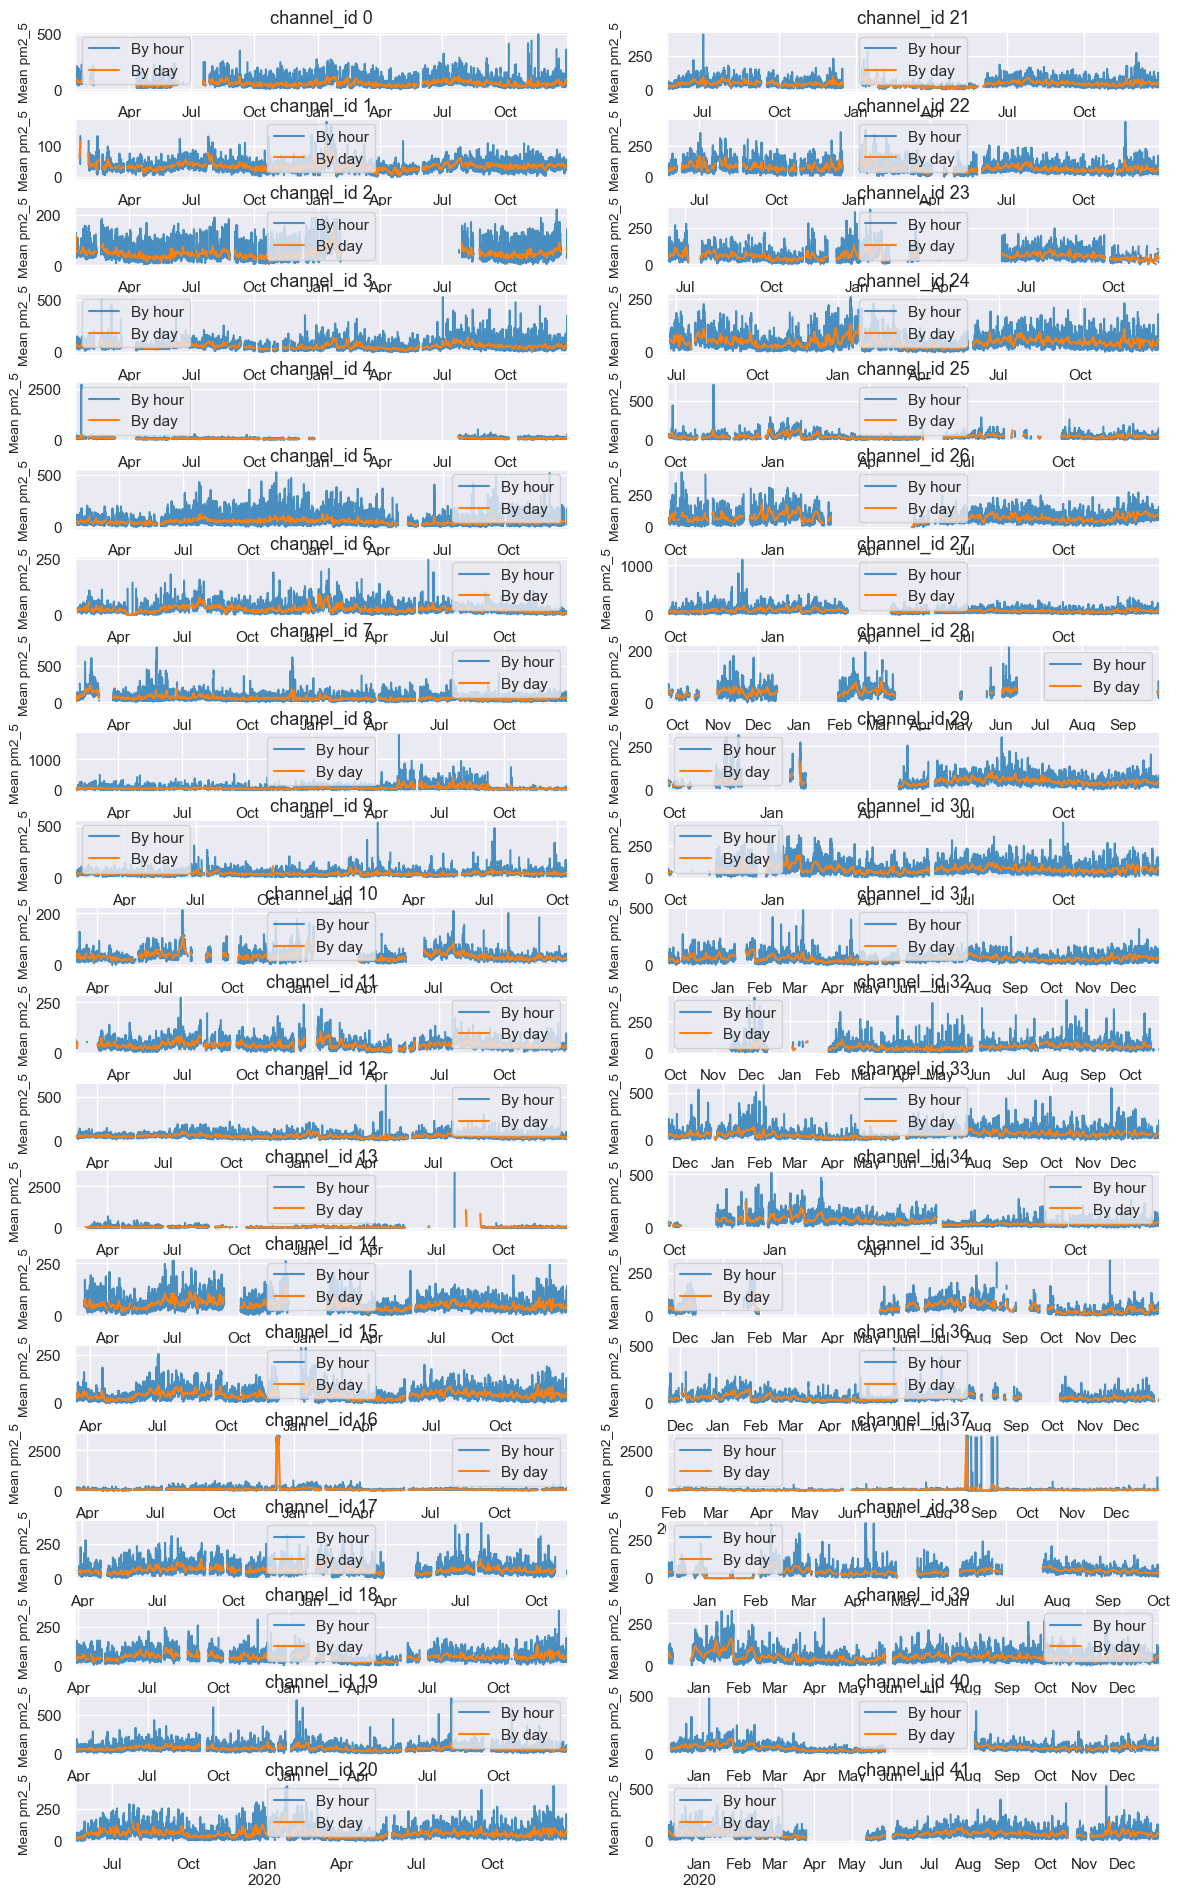

In [75]:
fig, axes = plt.subplots(21,2,figsize=(14, 24), dpi=100)
for i in range(train_data['channel_id'].nunique()):
    train_data[train_data['channel_id'] == i][['TimeStamp', 'pm2_5']].set_index('TimeStamp').resample('H').mean()['pm2_5'].plot(ax=axes[i%21][i//21], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean pm2_5', fontsize=10);
    train_data[train_data['channel_id'] == i][['TimeStamp', 'pm2_5']].set_index('TimeStamp').resample('D').mean()['pm2_5'].plot(ax=axes[i%21][i//21], alpha=1, label='By day', color='tab:orange').set_xlabel('');
    axes[i%21][i//21].legend();
    axes[i%21][i//21].set_title('channel_id {}'.format(i), fontsize=13);
    plt.subplots_adjust(hspace=0.45)

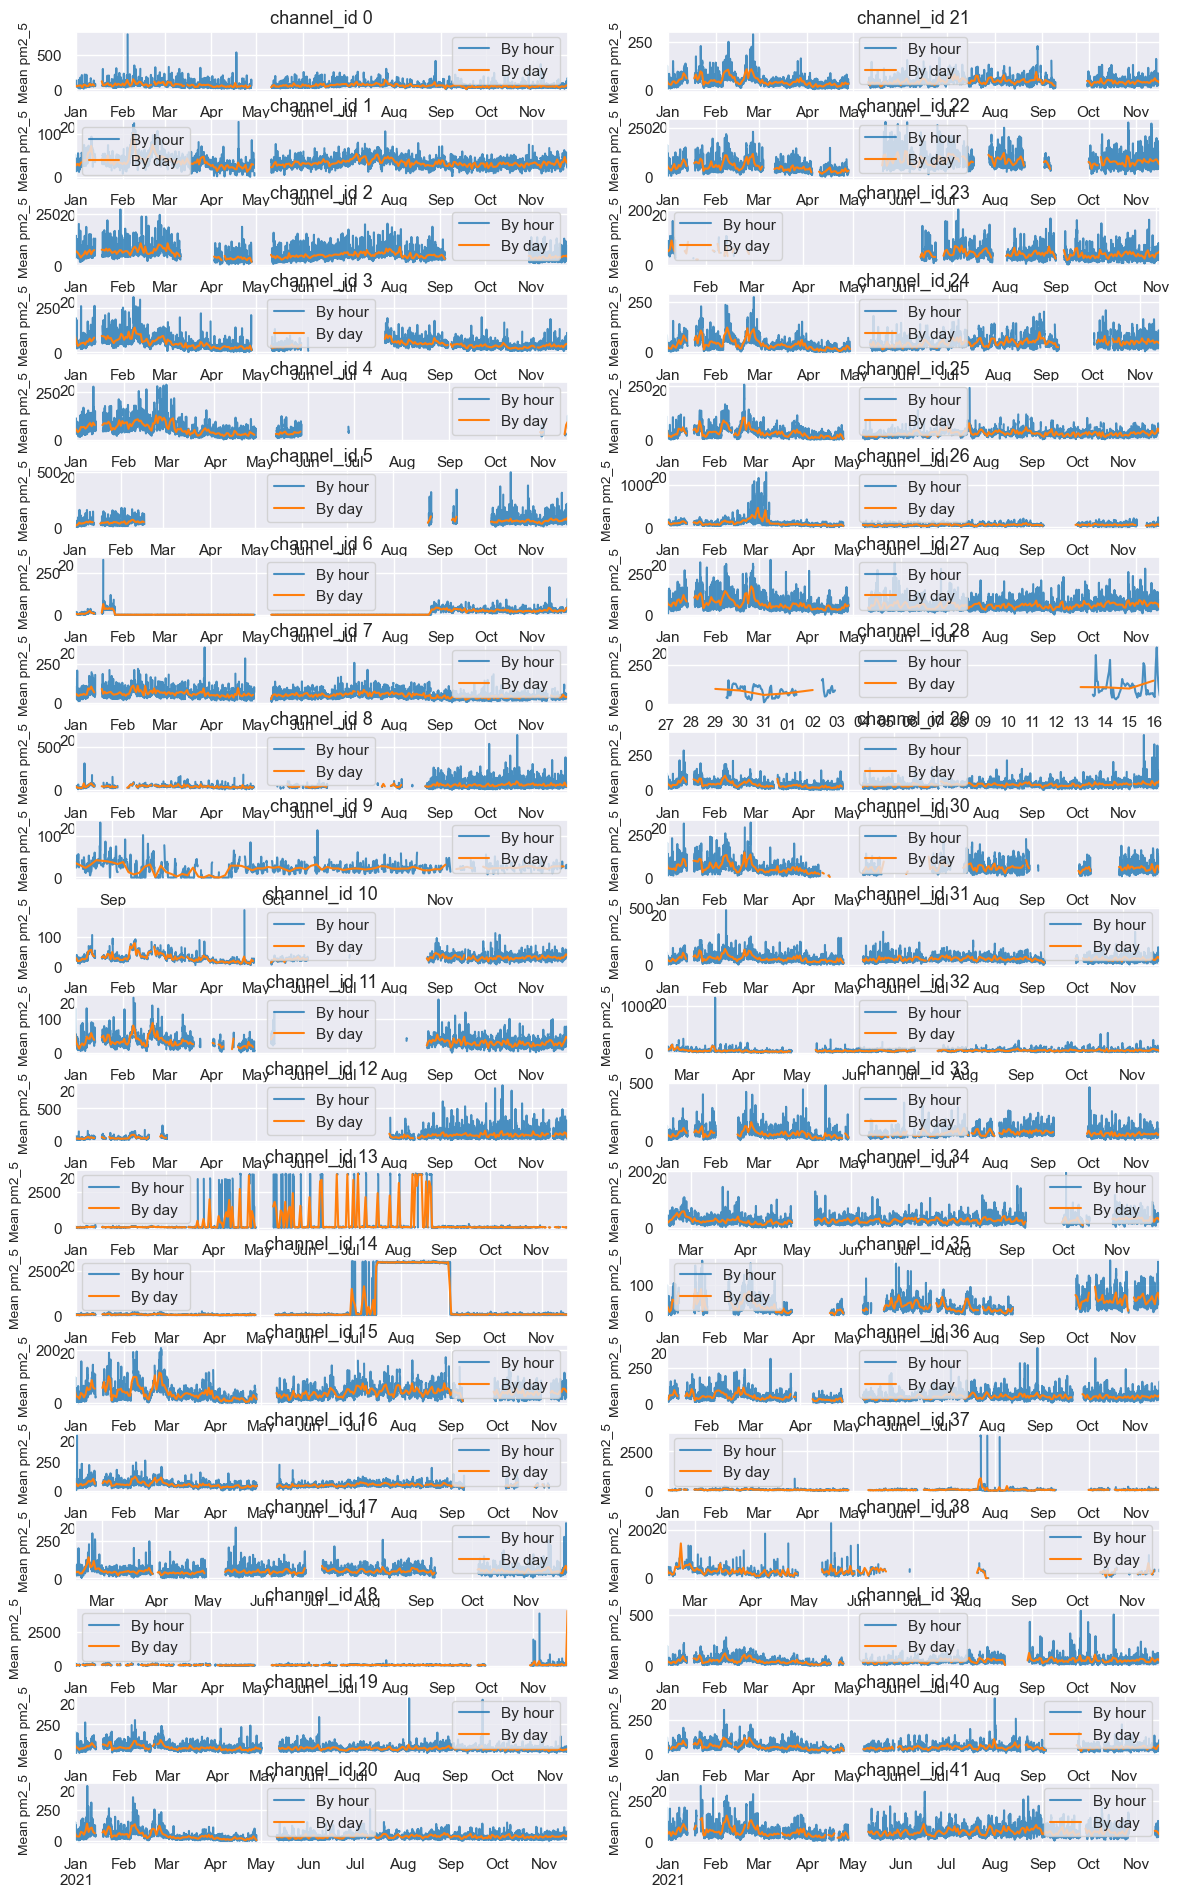

In [76]:
fig, axes = plt.subplots(21,2,figsize=(14, 24), dpi=100)
for i in range(test_data['channel_id'].nunique()):
    test_data[test_data['channel_id'] == i][['TimeStamp', 'pm2_5']].set_index('TimeStamp').resample('H').mean()['pm2_5'].plot(ax=axes[i%21][i//21], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean pm2_5', fontsize=10);
    test_data[test_data['channel_id'] == i][['TimeStamp', 'pm2_5']].set_index('TimeStamp').resample('D').mean()['pm2_5'].plot(ax=axes[i%21][i//21], alpha=1, label='By day', color='tab:orange').set_xlabel('');
    axes[i%21][i//21].legend();
    axes[i%21][i//21].set_title('channel_id {}'.format(i), fontsize=13);
    plt.subplots_adjust(hspace=0.45)

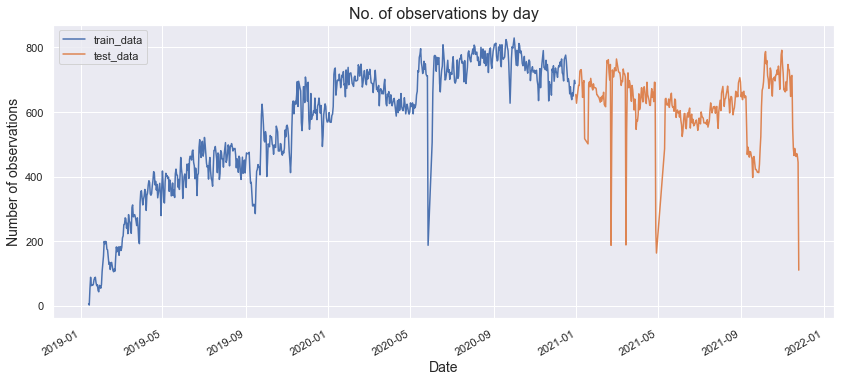

In [79]:
#Number of observations per day
fig, axes = plt.subplots(1, 1, figsize=(14, 6))
train_data['TimeStamp'].dt.floor('d').value_counts().sort_index().plot(ax=axes).set_xlabel('Date', fontsize=14);
test_data['TimeStamp'].dt.floor('d').value_counts().sort_index().plot(ax=axes).set_ylabel('No of observations', fontsize=14);
axes.set_title('No. of observations by day', fontsize=16);
axes.legend(['train_data', 'test_data']);

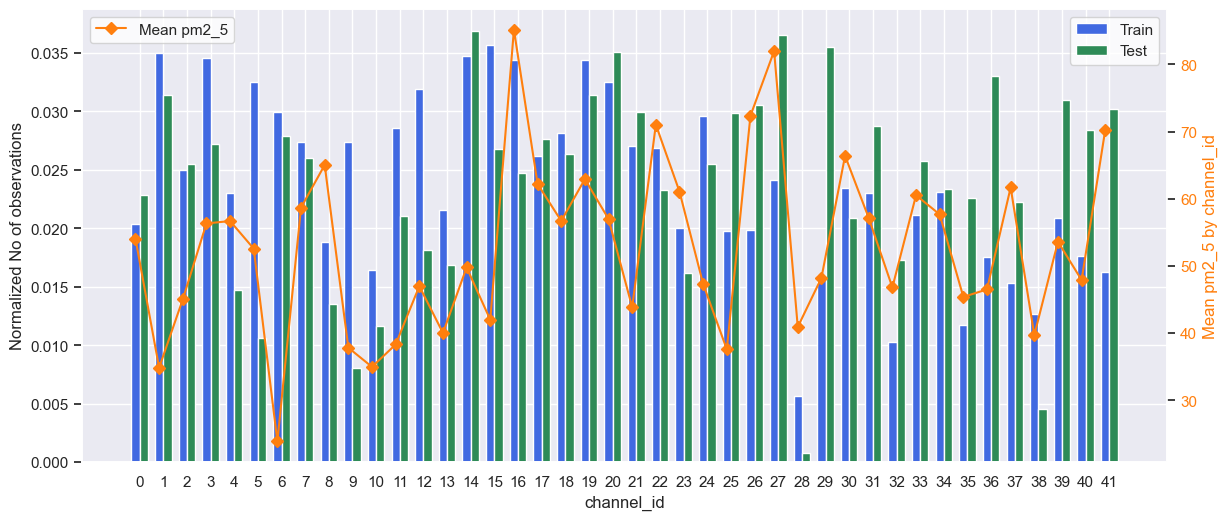

In [108]:
train_d = train_data['channel_id'].value_counts(dropna=False, normalize=True).sort_index().values
ind = np.arange(len(train_d))
width = 0.35

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
tr = axes.bar(ind, train_d, width, color='royalblue')

test_d = test_data['channel_id'].value_counts(dropna=False, normalize=True).sort_index().values
tt = axes.bar(ind+width, test_d, width, color='seagreen')

axes.set_ylabel('Normalized No of observations');
axes.set_xlabel('channel_id');
axes.set_xticks(ind + width / 2)
axes.set_xticklabels(train_data['channel_id'].value_counts().sort_index().index, rotation=0)
axes2 = axes.twinx()
mr = axes2.plot(ind, train_data[['channel_id', 'pm2_5']].groupby('channel_id')['pm2_5'].mean().sort_index().values, 'D-', color='tab:orange', label='Mean pm2_5');
axes2.grid(False);
axes2.tick_params(axis='y', labelcolor='tab:orange');
axes2.set_ylabel('Mean pm2_5 by channel_id', color='tab:orange');
axes.legend([tr, tt], ['Train', 'Test'], facecolor='white');
axes2.legend(loc=2, facecolor='white');

In [99]:
train_data['hour'] = train_data['TimeStamp'].dt.hour
test_data['hour'] = test_data['TimeStamp'].dt.hour

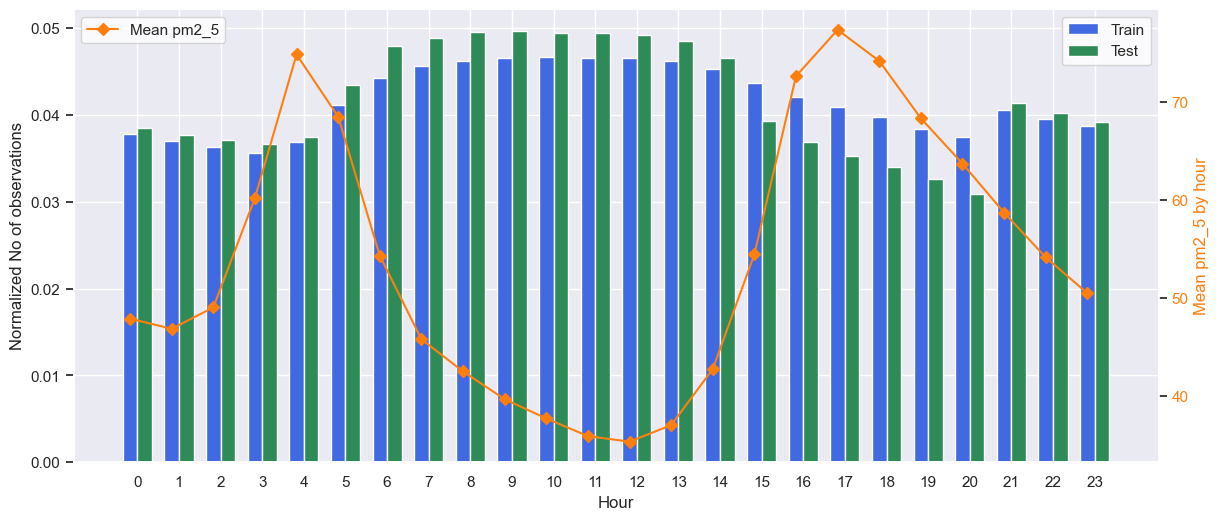

In [107]:
train_d = train_data['hour'].value_counts(dropna=False, normalize=True).sort_index().values
ind = np.arange(len(train_d))
width = 0.35

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
tr = axes.bar(ind, train_d, width, color='royalblue')

test_d = test_data['hour'].value_counts(dropna=False, normalize=True).sort_index().values
tt = axes.bar(ind+width, test_d, width, color='seagreen')

axes.set_ylabel('Normalized No of observations');
axes.set_xlabel('Hour');
axes.set_xticks(ind + width / 2)
axes.set_xticklabels(train_data['hour'].value_counts().sort_index().index, rotation=0)
axes2 = axes.twinx()
mr = axes2.plot(ind, train_data[['hour', 'pm2_5']].groupby('hour')['pm2_5'].mean().sort_index().values, 'D-', color='tab:orange', label='Mean pm2_5');
axes2.grid(False);
axes2.tick_params(axis='y', labelcolor='tab:orange');
axes2.set_ylabel('Mean pm2_5 by hour', color='tab:orange');
axes.legend([tr, tt], ['Train', 'Test'], facecolor='white');
axes2.legend(loc=2, facecolor='white');

In [101]:
train_data['day'] = train_data['TimeStamp'].dt.day
test_data['day'] = test_data['TimeStamp'].dt.day

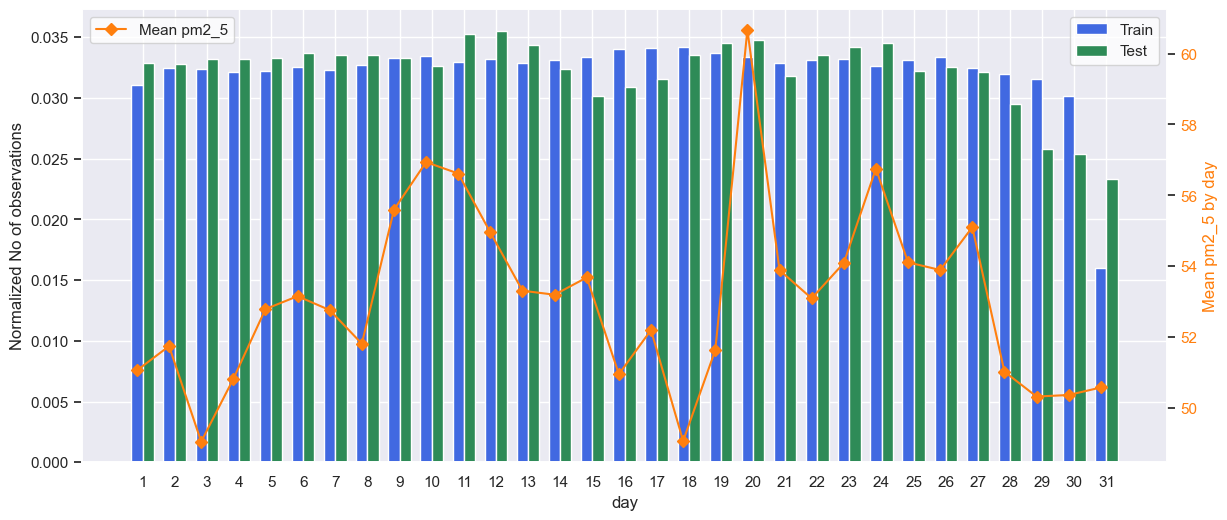

In [106]:
train_d = train_data['day'].value_counts(dropna=False, normalize=True).sort_index().values
ind = np.arange(len(train_d))
width = 0.35

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
tr = axes.bar(ind, train_d, width, color='royalblue')

test_d = test_data['day'].value_counts(dropna=False, normalize=True).sort_index().values
tt = axes.bar(ind+width, test_d, width, color='seagreen')

axes.set_ylabel('Normalized No of observations');
axes.set_xlabel('day');
axes.set_xticks(ind + width / 2)
axes.set_xticklabels(train_data['day'].value_counts().sort_index().index, rotation=0)
axes2 = axes.twinx()
mr = axes2.plot(ind, train_data[['day', 'pm2_5']].groupby('day')['pm2_5'].mean().sort_index().values, 'D-', color='tab:orange', label='Mean pm2_5');
axes2.grid(False);
axes2.tick_params(axis='y', labelcolor='tab:orange');
axes2.set_ylabel('Mean pm2_5 by day', color='tab:orange');
axes.legend([tr, tt], ['Train', 'Test'], facecolor='white');
axes2.legend(loc=2, facecolor='white');

In [103]:
train_data['weekday'] = train_data['TimeStamp'].dt.weekday
test_data['weekday'] = test_data['TimeStamp'].dt.weekday

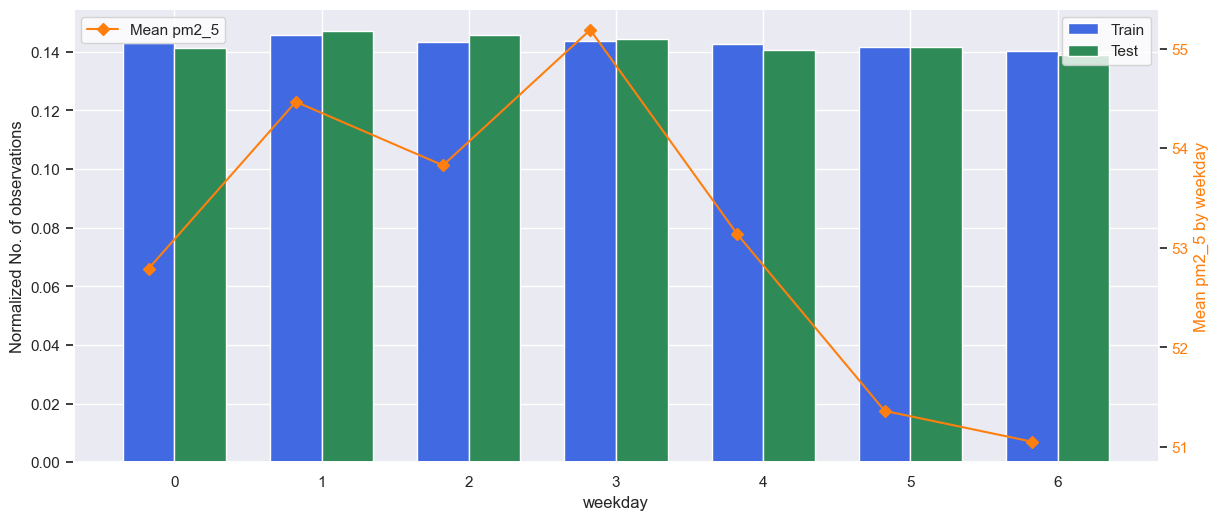

In [105]:
train_d = train_data['weekday'].value_counts(dropna=False, normalize=True).sort_index().values
ind = np.arange(len(train_d))
width = 0.35

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
tr = axes.bar(ind, train_d, width, color='royalblue')

test_d = test_data['weekday'].value_counts(dropna=False, normalize=True).sort_index().values
tt = axes.bar(ind+width, test_d, width, color='seagreen')

axes.set_ylabel('Normalized No. of observations');
axes.set_xlabel('weekday');
axes.set_xticks(ind + width / 2)
axes.set_xticklabels(train_data['weekday'].value_counts().sort_index().index, rotation=0)
axes2 = axes.twinx()
mr = axes2.plot(ind, train_data[['weekday', 'pm2_5']].groupby('weekday')['pm2_5'].mean().sort_index().values, 'D-', color='tab:orange', label='Mean pm2_5');
axes2.grid(False);
axes2.tick_params(axis='y', labelcolor='tab:orange');
axes2.set_ylabel('Mean pm2_5 by weekday', color='tab:orange');
axes.legend([tr, tt], ['Train', 'Test'], facecolor='white');
axes2.legend(loc=2, facecolor='white');

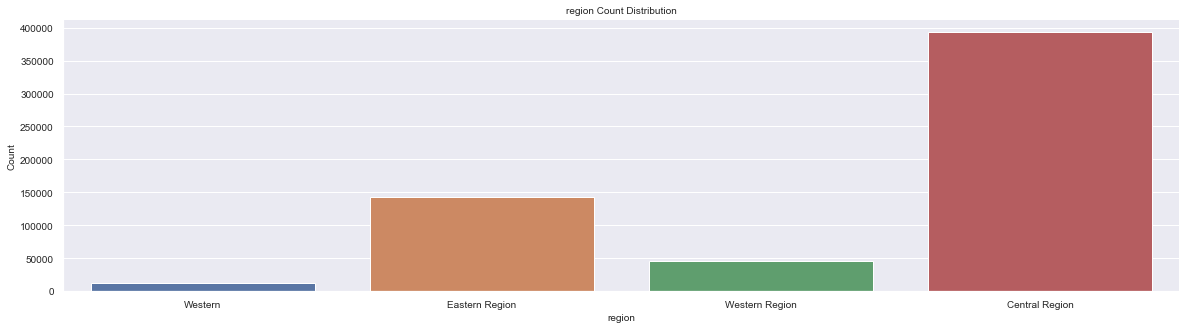

In [110]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'region', data = data)
ax.set_xlabel('region', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('region Count Distribution', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

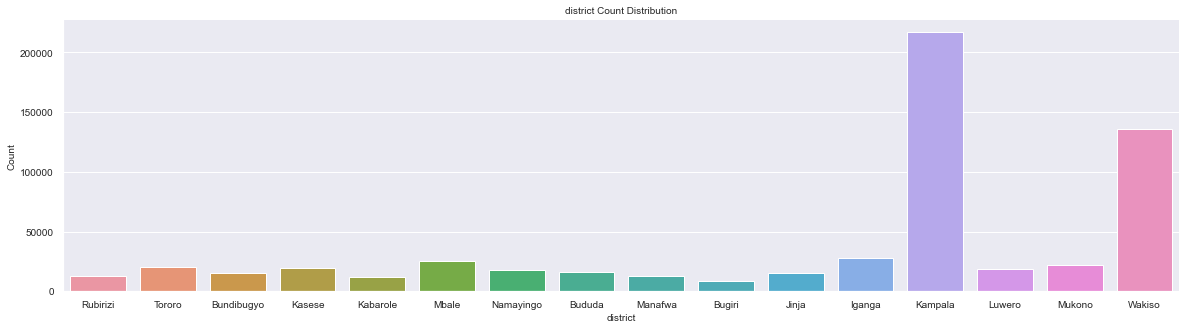

In [111]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'district', data = data)
ax.set_xlabel('district', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('district Count Distribution', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

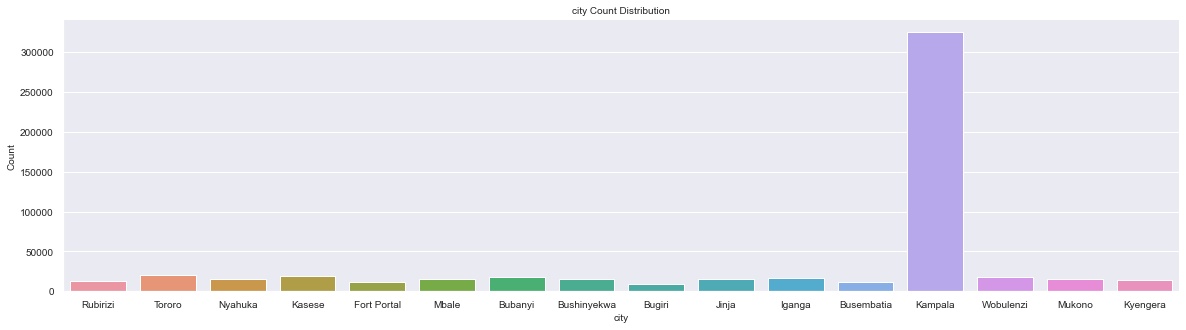

In [112]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'city', data = data)
ax.set_xlabel('city', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('city Count Distribution', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

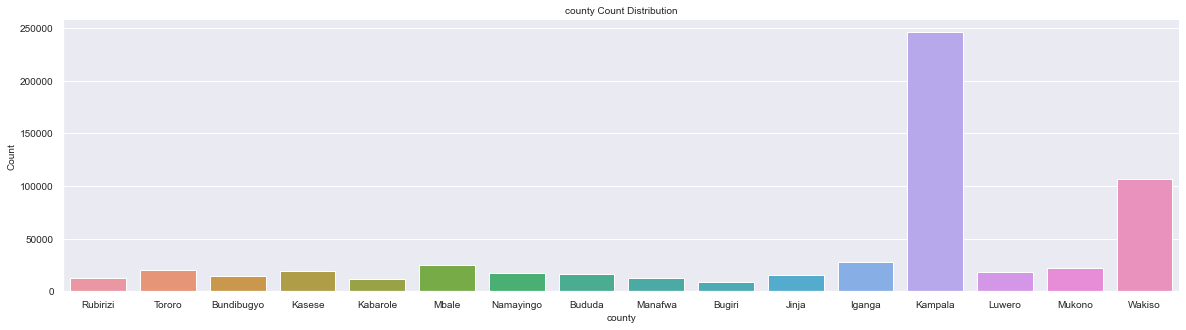

In [113]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'county', data = data)
ax.set_xlabel('county', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('county Count Distribution', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

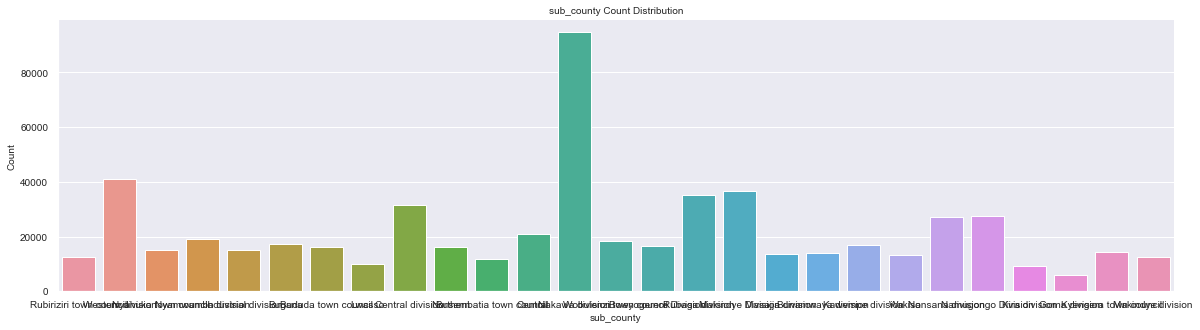

In [114]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'sub_county', data = data)
ax.set_xlabel('sub_county', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('sub_county Count Distribution', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()